**[MSE-01]** モジュールをインポートして、乱数のシードを設定します。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

**[MSE-02]** MNISTのデータセットを用意します。

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
### TensorFlowのバージョンによっては下記のwarningが表示されるが、無視するしかない。
# WARNING:tensorflow:From <ipython-input-2-******>:1: ...
# Instructions for updating:
# Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
#...　

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


**[MSE-03]** ソフトマックス関数による確率 p の計算式を用意します。

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

**[MSE-04]** 誤差関数 loss とトレーニングアルゴリズム train_step を用意します。

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MSE-05]** 正解率 accuracy を定義します。

In [5]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MSE-06]** セッションを用意して、Variableを初期化します。

In [6]:
### >>> with GPU 80%
#gpuConfig = tf.ConfigProto(
#    gpu_options = tf.GPUOptions(
#        per_process_gpu_memory_fraction = 0.8),
#    device_count = {'GPU':0})
#sess = tf.Session(config = gpuConfig)
### <<<
#
### >>> with CPU only
sess = tf.Session()
### <<<
sess.run(tf.global_variables_initializer())

**[MSE-07]** パラメーターの最適化を2000回繰り返します。

1回の処理において、トレーニングセットから取り出した100個のデータを用いて、勾配降下法を適用します。

最終的に、テストセットに対して約92%の正解率が得られます。

In [7]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 7507.942871, Accuracy: 0.849600
Step: 200, Loss: 5324.916992, Accuracy: 0.879700
Step: 300, Loss: 4502.329102, Accuracy: 0.889900
Step: 400, Loss: 4072.601318, Accuracy: 0.898600
Step: 500, Loss: 3816.755127, Accuracy: 0.901300
Step: 600, Loss: 3588.107422, Accuracy: 0.907000
Step: 700, Loss: 3445.506836, Accuracy: 0.910100
Step: 800, Loss: 3359.558594, Accuracy: 0.908400
Step: 900, Loss: 3262.390381, Accuracy: 0.911900
Step: 1000, Loss: 3169.308105, Accuracy: 0.913700
Step: 1100, Loss: 3120.316162, Accuracy: 0.913900
Step: 1200, Loss: 3072.792480, Accuracy: 0.915700
Step: 1300, Loss: 3040.957275, Accuracy: 0.914100
Step: 1400, Loss: 2987.056152, Accuracy: 0.918100
Step: 1500, Loss: 2976.636963, Accuracy: 0.917900
Step: 1600, Loss: 2927.661621, Accuracy: 0.918600
Step: 1700, Loss: 2902.846191, Accuracy: 0.919800
Step: 1800, Loss: 2888.015625, Accuracy: 0.920700
Step: 1900, Loss: 2867.930176, Accuracy: 0.919900
Step: 2000, Loss: 2829.065674, Accuracy: 0.921100


**[MSE-08]** この時点のパラメーターを用いて、テストセットに対する予測を表示します。

ここでは、「０」〜「９」の数字に対して、正解と不正解の例を３個ずつ表示します。

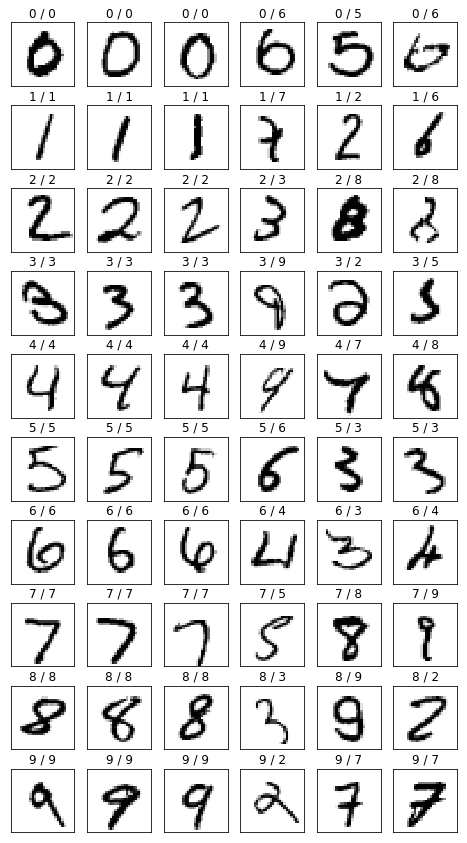

In [8]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break